# Exploring the Relationship Between Gun Background Checks and Gun Death Rates

### Objective:
Investigate the correlation between the frequency of gun background checks conducted in different states and the rate of gun-related deaths over time.

### Key Questions:
1. **Temporal Analysis:** How have the patterns of gun background checks and gun death rates changed from 1999 to 2019?
2. **Geographical Analysis:** Are there specific states or regions with higher correlations between background check volumes and gun death rates?
3. **Demographic Factors:** How do population demographics and density influence the rate of gun background checks and gun deaths?
4. **Policy Impact:** How have state-specific gun control laws impacted the relationship between background checks and gun deaths?


### Methodology:
1. **Data Preprocessing:** Clean and preprocess the datasets to handle missing values and align them for temporal and geographical analysis.
2. **Correlation Analysis:** Perform statistical analysis to evaluate the correlation between background checks and gun death rates, adjusting for population size.
3. **Trend Analysis:** Use time series analysis to identify trends and patterns over the years.
4. **Geospatial Analysis:** Utilize geographical data to map the trends and identify hotspots.
5. **Policy Evaluation:** Analyze the impact of specific gun control measures implemented in different states.

### Potential Impact:
Understanding the relationship between gun background checks and gun deaths can inform policymakers and stakeholders on the effectiveness of current measures and potential areas for intervention to reduce gun-related fatalities.

<!--
1. explore how many gun death happened in the u.s since 1999 per capita
2. when does gun death increase or decrease why?
3. how many murder happened with or without a register fire arms? 
4. when does background check increase or decrease why?
5. does gun sales increase gun death?
6. when does gun sales increase or decrease why?
7. does gun death increase gun sales ?
8. does background check decrease or increase gun death rate?
9. does back groind check increse gun sales or not?
10. does those fire amrs register to fbi database? -->

In [8]:
# importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Data preprocessing

In [10]:
# load the datasets
gun_death_data_set = pd.read_csv("gun_deaths_us_1999_2019.csv", index_col=0) # index_col = 0 uses the first column as the index
fbi_check_data_set = pd.read_csv("002-FBI-Background-checks_out.csv")


In [11]:
# Display the first few rows of each dataset to understand their structure
display(gun_death_data_set.head()), display(fbi_check_data_set.head())

,Year,County,County Code,State,State_Name,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,1999,Baldwin County,1003,AL,Alabama,1,22,137555,15.99,10.02,24.21,16.28,10.20,24.64
1,1999,Calhoun County,1015,AL,Alabama,1,29,114910,25.24,16.90,36.24,25.21,16.89,36.21
2,1999,Chambers County,1017,AL,Alabama,1,10,36527,NaN,13.13,50.35,NaN,12.91,49.51
3,1999,Colbert County,1033,AL,Alabama,1,14,54715,NaN,13.99,42.93,NaN,13.54,41.57
4,1999,Dallas County,1047,AL,Alabama,1,11,46722,NaN,11.75,42.13,NaN,12.15,43.54


,month,state,handgun,long_gun,total,centralPoint,population,geometry,xtext,ytext
0,2020-03,Alabama,34897,17850,52747,POINT (-86.8295337 33.2588817),4779736,"POLYGON ((-85.05441500000001 31.108696, -85.00...",0,0
1,2020-03,Arizona,46377,19346,65723,POINT (-111.7632755 34.395342),6392017,"POLYGON ((-109.045225 36.999912, -109.043673 3...",0,0
2,2020-03,Arkansas,15304,8968,24272,POINT (-92.4479108 35.2048883),2915918,"POLYGON ((-89.662919 36.023073, -89.673513 35....",0,0
3,2020-03,California,81543,48616,130159,POINT (-118.7559974 36.7014631),37253956,"POLYGON ((-114.354901 34.464667, -114.165972 3...",-100,0
4,2020-03,Colorado,43322,22756,66078,POINT (-105.6077167 38.7251776),5029196,"POLYGON ((-102.050174 40.000815, -102.040123 3...",0,0


(None, None)

In [12]:
# check for duplicated records
print(gun_death_data_set.duplicated().sum())
print(fbi_check_data_set.duplicated().sum())

0
0


In [13]:
# Check for the missing record counts, data types
print("GUN DATA:")
print(gun_death_data_set.info()) 
print("\n")
print("FBI BACKGROUND CHECK:")
print(fbi_check_data_set.info())

GUN DATA:
<class 'pandas.core.frame.DataFrame'>
Index: 14358 entries, 0 to 14357
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             14358 non-null  int64  
 1   County                                           14358 non-null  object 
 2   County Code                                      14358 non-null  int64  
 3   State                                            14358 non-null  object 
 4   State_Name                                       14358 non-null  object 
 5   State Code                                       14358 non-null  int64  
 6   Deaths                                           14358 non-null  int64  
 7   Population                                       14358 non-null  int64  
 8   Crude Rate                                       6871 non-null   float64
 9   Crude Rate Lower 95% Co

- From the Gun data, `Crude Rate` and `Age Adjusted Rate` fileds contains missing values (which will be handle later on)
- FBI background check data doesn't contain any missing record, however, the month column should be of `datetime` data type

In [15]:
# Check for the basic statistical summary of the data sets
display(gun_death_data_set.describe()), display(fbi_check_data_set.describe())

,Year,County Code,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
count,14358.000000,14358.000000,14358.000000,14358.000000,1.435800e+04,6871.000000,14358.000000,14358.000000,6871.000000,14358.000000,14358.000000
mean,2009.729001,29281.214932,29.185889,37.977295,3.483752e+05,13.016642,8.714880,22.155099,12.868769,8.502092,22.178964
std,6.087750,15964.114691,15.938389,67.028493,6.049484e+05,6.754188,4.977357,13.844703,6.708741,4.900124,14.186927
min,1999.000000,1001.000000,1.000000,10.000000,7.459000e+03,1.350000,0.550000,1.720000,1.300000,0.550000,1.640000
25%,2005.000000,13217.000000,13.000000,13.000000,9.277950e+04,8.470000,5.340000,13.100000,8.430000,5.200000,13.150000
50%,2010.000000,30063.000000,30.000000,19.000000,1.685100e+05,12.000000,7.830000,19.080000,11.830000,7.620000,18.940000
75%,2015.000000,42081.000000,42.000000,36.000000,3.748638e+05,16.170000,11.030000,27.660000,15.975000,10.690000,27.517500
max,2019.000000,56037.000000,56.000000,1273.000000,1.017029e+07,69.950000,64.290000,246.550000,79.110000,62.360000,258.880000


,handgun,long_gun,total,population,xtext,ytext
count,12495.000000,12495.000000,12495.000000,1.249500e+04,12495.000000,12495.000000
mean,7299.201841,8731.815686,16031.017527,6.258674e+06,18.061224,0.816327
std,9803.821634,9293.986204,16929.142400,6.815170e+06,60.009343,49.068213
min,0.000000,0.000000,0.000000,5.636260e+05,-120.000000,-120.000000
25%,1493.500000,2919.000000,5008.500000,1.852994e+06,0.000000,0.000000
50%,4077.000000,6081.000000,10782.000000,4.533372e+06,0.000000,0.000000
75%,9029.500000,11284.000000,20655.500000,6.724540e+06,60.000000,10.000000
max,147714.000000,108058.000000,209541.000000,3.725396e+07,160.000000,120.000000


(None, None)

In [17]:
# Fill any missing value with midpoint of confidence Intervals

# Define the function to fill missing age-adjusted rates
def fill_missing_age_adjusted_rate(row):
    if pd.isnull(row['Age Adjusted Rate']):
        # Calculate the midpoint of the confidence interval
        lower_bound = row['Age Adjusted Rate Lower 95% Confidence Interval']
        upper_bound = row['Age Adjusted Rate Upper 95% Confidence Interval']
        midpoint = (lower_bound + upper_bound) / 2
        return midpoint-1
    else:
        return row['Age Adjusted Rate']

# Apply the function to fill missing values
gun_death_data_set['Age Adjusted Rate'] = gun_death_data_set.apply(fill_missing_age_adjusted_rate, axis=1)


# Convert the 'month' column in the FBI background checks data to a datetime format
fbi_check_data_set['month'] = pd.to_datetime(fbi_check_data_set['month'])
print("GUN DATA:")
print(gun_death_data_set.info()) 
print("\n")
print("FBI BACKGROUND CHECK:")
print(fbi_check_data_set.info())

GUN DATA:
<class 'pandas.core.frame.DataFrame'>
Index: 14358 entries, 0 to 14357
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             14358 non-null  int64  
 1   County                                           14358 non-null  object 
 2   County Code                                      14358 non-null  int64  
 3   State                                            14358 non-null  object 
 4   State_Name                                       14358 non-null  object 
 5   State Code                                       14358 non-null  int64  
 6   Deaths                                           14358 non-null  int64  
 7   Population                                       14358 non-null  int64  
 8   Crude Rate                                       6871 non-null   float64
 9   Crude Rate Lower 95% Co

In [18]:
display(gun_death_data_set.head()), display(fbi_check_data_set.head())

,Year,County,County Code,State,State_Name,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,1999,Baldwin County,1003,AL,Alabama,1,22,137555,15.99,10.02,24.21,16.280,10.20,24.64
1,1999,Calhoun County,1015,AL,Alabama,1,29,114910,25.24,16.90,36.24,25.210,16.89,36.21
2,1999,Chambers County,1017,AL,Alabama,1,10,36527,NaN,13.13,50.35,30.210,12.91,49.51
3,1999,Colbert County,1033,AL,Alabama,1,14,54715,NaN,13.99,42.93,26.555,13.54,41.57
4,1999,Dallas County,1047,AL,Alabama,1,11,46722,NaN,11.75,42.13,26.845,12.15,43.54


,month,state,handgun,long_gun,total,centralPoint,population,geometry,xtext,ytext
0,2020-03-01,Alabama,34897,17850,52747,POINT (-86.8295337 33.2588817),4779736,"POLYGON ((-85.05441500000001 31.108696, -85.00...",0,0
1,2020-03-01,Arizona,46377,19346,65723,POINT (-111.7632755 34.395342),6392017,"POLYGON ((-109.045225 36.999912, -109.043673 3...",0,0
2,2020-03-01,Arkansas,15304,8968,24272,POINT (-92.4479108 35.2048883),2915918,"POLYGON ((-89.662919 36.023073, -89.673513 35....",0,0
3,2020-03-01,California,81543,48616,130159,POINT (-118.7559974 36.7014631),37253956,"POLYGON ((-114.354901 34.464667, -114.165972 3...",-100,0
4,2020-03-01,Colorado,43322,22756,66078,POINT (-105.6077167 38.7251776),5029196,"POLYGON ((-102.050174 40.000815, -102.040123 3...",0,0


(None, None)

To validate the FBI background check dataset, we aim to determine the number of states represented and assess whether each state has records for the same months, ensuring equal representation:

In [20]:
# Check for the number of states represented in the FBI background check dataset
fbi_check_data_set['state'].nunique()

49

In [21]:
# Check that the states all have equal month's records
fbi_check_data_set.groupby(['state', 'month']).count().reset_index()['state'].value_counts()

state
Alabama                 255
Nebraska                255
New Hampshire           255
New Jersey              255
New Mexico              255
New-York State          255
North Carolina          255
North Dakota            255
Ohio                    255
Oklahoma                255
Oregon                  255
Pennsylvania            255
Rhode Island            255
South Carolina          255
South Dakota            255
Tennessee               255
Texas                   255
Utah                    255
Vermont                 255
Virginia                255
Washington State        255
West Virginia           255
Wisconsin               255
Nevada                  255
Montana                 255
Arizona                 255
Missouri                255
Arkansas                255
California              255
Colorado                255
Connecticut             255
Delaware                255
District of Columbia    255
Florida                 255
Georgia                 255
Idaho         

The FBI dataset is consistent: each state has records for the same number of months.\
Now, let's check-in with gun death dataset:

In [23]:
# Check for the number of states represented in the gun death background check dataset
gun_death_data_set['State_Name'].nunique()

50

In [24]:
#What state is listed in gun data that's not listed in fbi check data?
set(gun_death_data_set['State_Name'].unique()) - set(fbi_check_data_set['state'].unique())

{'Alaska', 'Hawaii', 'New York', 'Washington'}

In [25]:
#What state is listed fbi check data that's not listed in gun data ?
set(fbi_check_data_set['state'].unique())- set(gun_death_data_set['State_Name'].unique())

{'District of Columbia', 'New-York State', 'Washington State'}

- Now, we could tell that `New York`, `Washington`  are represented differently in FBI check data set (`New York State`, `Washington State`). 
- `Alaska` and `Hawaii` are present in gun death data but missing in fbi check data.
-  `District of Columbia` (not really a state) is covered by the fbi background check data but not in the gun death data

In [27]:
# Rename state names for consistency
fbi_check_data_set['state'] = fbi_check_data_set['state'].replace({"New-York State": "New York",
                                                                   "Washington State": "Washington"})

# check
set(fbi_check_data_set['state'].unique())- set(gun_death_data_set['State_Name'].unique()), \
set(gun_death_data_set['State_Name'].unique()) - set(fbi_check_data_set['state'].unique())

({'District of Columbia'}, {'Alaska', 'Hawaii'})

In [28]:
# Summarize the gun deaths data by year and state
gun_deaths_yearly = gun_death_data_set.groupby(['Year', 'State_Name']).agg({'Deaths': 'sum', 
                                                                            'Population': 'mean', 
                                                                            'Age Adjusted Rate': 'mean'}).reset_index()
gun_deaths_yearly.rename(columns={'Year': 'year', 'State_Name': 'state'}, inplace=True)

# Aggregate the background checks data by year and state for analysis
fbi_background_checks_yearly = fbi_check_data_set.groupby([fbi_check_data_set['month'].dt.year, 'state']).agg({'handgun': 'sum', 
                                                                                  'long_gun': 'sum', 
                                                                                  'total': 'sum', 
                                                                                  'population': 'mean'}).reset_index()
fbi_background_checks_yearly.rename(columns={'month': 'year'}, inplace=True)

In [29]:
display(gun_deaths_yearly), display(fbi_background_checks_yearly)

,year,state,Deaths,Population,Age Adjusted Rate
0,1999,Alabama,605,145106.714286,21.330476
1,1999,Alaska,40,171369.000000,13.632500
2,1999,Arizona,789,528782.222222,18.188333
3,1999,Arkansas,160,142680.285714,18.062857
4,1999,California,2964,975299.090909,9.536667
...,...,...,...,...,...
1027,2019,Virginia,663,209373.653846,18.481154
1028,2019,Washington,776,370059.684211,13.944474
1029,2019,West Virginia,134,87587.285714,28.210714
1030,2019,Wisconsin,391,244906.200000,11.175333


,year,state,handgun,long_gun,total,population
0,1999,Alabama,94544,149017,243561,4779736.0
1,1999,Arizona,78103,71365,149468,6392017.0
2,1999,Arkansas,50523,126875,177398,2915918.0
3,1999,California,371893,410119,782012,37253956.0
4,1999,Colorado,102368,147253,249621,5029196.0
...,...,...,...,...,...,...
1073,2020,Virginia,124800,66141,190941,8001024.0
1074,2020,Washington,69058,38512,107570,6724540.0
1075,2020,West Virginia,26313,20426,46739,1852994.0
1076,2020,Wisconsin,74254,40308,114562,5686986.0


(None, None)

In [30]:
# Renaming columns for clarity and to avoid any potential mismatches
gun_deaths_yearly.rename(columns={'Population': 'population_deaths'}, inplace=True)
fbi_background_checks_yearly.rename(columns={'population': 'population_checks', 
                                             "total": "total_checks",
                                             'handgun': 'hand_gun_checks',
                                             'long_gun': 'long_gun_checks'}, inplace=True)


In [31]:
# Re-merge the datasets on year and state
merged_data_corrected = pd.merge(left= fbi_background_checks_yearly,
                                 right= gun_deaths_yearly,
                                 how='inner',
                                 on=['year', 'state'])

# Calculate the background checks per capita
merged_data_corrected['checks_per_capita'] = merged_data_corrected['total_checks'] / merged_data_corrected['population_checks']


In [32]:
merged_data_corrected.head()

,year,state,hand_gun_checks,long_gun_checks,total_checks,population_checks,Deaths,population_deaths,Age Adjusted Rate,checks_per_capita
0,1999,Alabama,94544,149017,243561,4779736.0,605,145106.714286,21.330476,0.050957
1,1999,Arizona,78103,71365,149468,6392017.0,789,528782.222222,18.188333,0.023384
2,1999,Arkansas,50523,126875,177398,2915918.0,160,142680.285714,18.062857,0.060838
3,1999,California,371893,410119,782012,37253956.0,2964,975299.090909,9.536667,0.020991
4,1999,Colorado,102368,147253,249621,5029196.0,385,299023.666667,12.130833,0.049634


In [33]:
merged_data_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               990 non-null    int32  
 1   state              990 non-null    object 
 2   hand_gun_checks    990 non-null    int64  
 3   long_gun_checks    990 non-null    int64  
 4   total_checks       990 non-null    int64  
 5   population_checks  990 non-null    float64
 6   Deaths             990 non-null    int64  
 7   population_deaths  990 non-null    float64
 8   Age Adjusted Rate  990 non-null    float64
 9   checks_per_capita  990 non-null    float64
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 73.6+ KB


The data has been successfully merged, providing a comprehensive view of gun background checks and gun deaths across states from 1999 to 2019. Now, let's proceed with the analysis:

## Analysis

**Correlation Analysis:** Evaluate the correlation between the number of background checks per capita and gun death rates.

**Trend Analysis:** Analyze trends over time for both background checks and gun deaths.

**Geospatial Analysis:** Identify any regional patterns or hotspots.

### Correlation analysis between checks per capita and gun death rates

The `checks per capita` refers to the number of certain events (in this context, gun background checks) conducted per person in a population. It provides a measure of the frequency of these events relative to the size of the population.

The `age-adjusted rate` is a statistical measure that accounts for the age distribution of a population when calculating rates of events, such as mortality incidence. It allows for fair comparisons between populations with different age structures by controlling for the effects of age.


**Advantages over comaparing raw values:**
- Normalized Comparison: By accounting for population size and age distribution, these metrics allow for fair comparisons across different regions or time periods.

- Risk Assessment: These rates can offer insights into the relative risk or intensity of gun activity and related deaths, potentially highlighting areas where gun violence is disproportionately high relative to gun ownership interest.

- Policy Impact: This analysis can be more informative for evaluating the effects of policies or societal changes on gun activity and its consequences.

In [37]:
correlation_analysis_1 = merged_data_corrected[['checks_per_capita', 'Age Adjusted Rate']].corr()

correlation_analysis_1[["checks_per_capita"]]

,checks_per_capita
checks_per_capita,1.000000
Age Adjusted Rate,0.538879


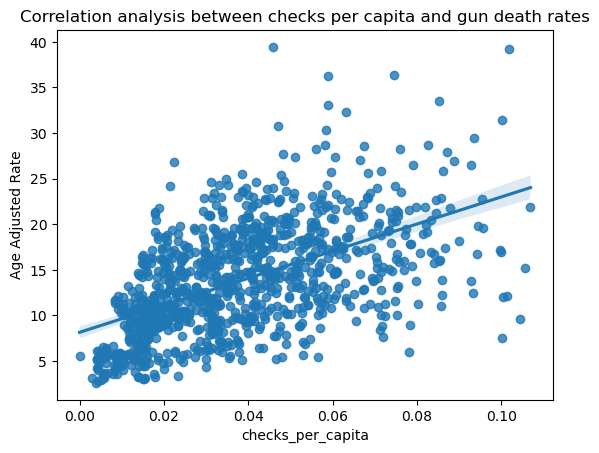

In [38]:
# plt.scatter(x = gun_fbi_df["Deaths"], y=gun_fbi_df["total"])
sns.regplot(x = merged_data_corrected['checks_per_capita'], y=merged_data_corrected['Age Adjusted Rate'])
plt.title("Correlation analysis between checks per capita and gun death rates")
plt.show()

The correlation analysis shows a moderate positive correlation of approximately 0.54 between background checks per capita and the age-adjusted gun death rate. This suggests that as the number of background checks per capita increases, there tends to be an increase in the gun death rate. However, this correlation is not strong enough to imply causation, and further analysis is required to understand the underlying factors.

### Trend analysis to observe how background checks and gun deaths have evolved over time

In [41]:
# Calculate yearly averages for checks per capita and age adjusted death rates
yearly_trends = merged_data_corrected.groupby('year').agg({'checks_per_capita': 'mean', 'Age Adjusted Rate': 'mean'}).reset_index()

yearly_trends

,year,checks_per_capita,Age Adjusted Rate
0,1999,0.031645,13.344321
1,2000,0.028980,12.925147
2,2001,0.029568,12.987215
3,2002,0.025673,13.406595
4,2003,0.026372,12.790972
5,2004,0.026681,12.627917
6,2005,0.027677,12.895779
7,2006,0.030111,12.485305
8,2007,0.029891,12.775341
9,2008,0.034078,13.027265


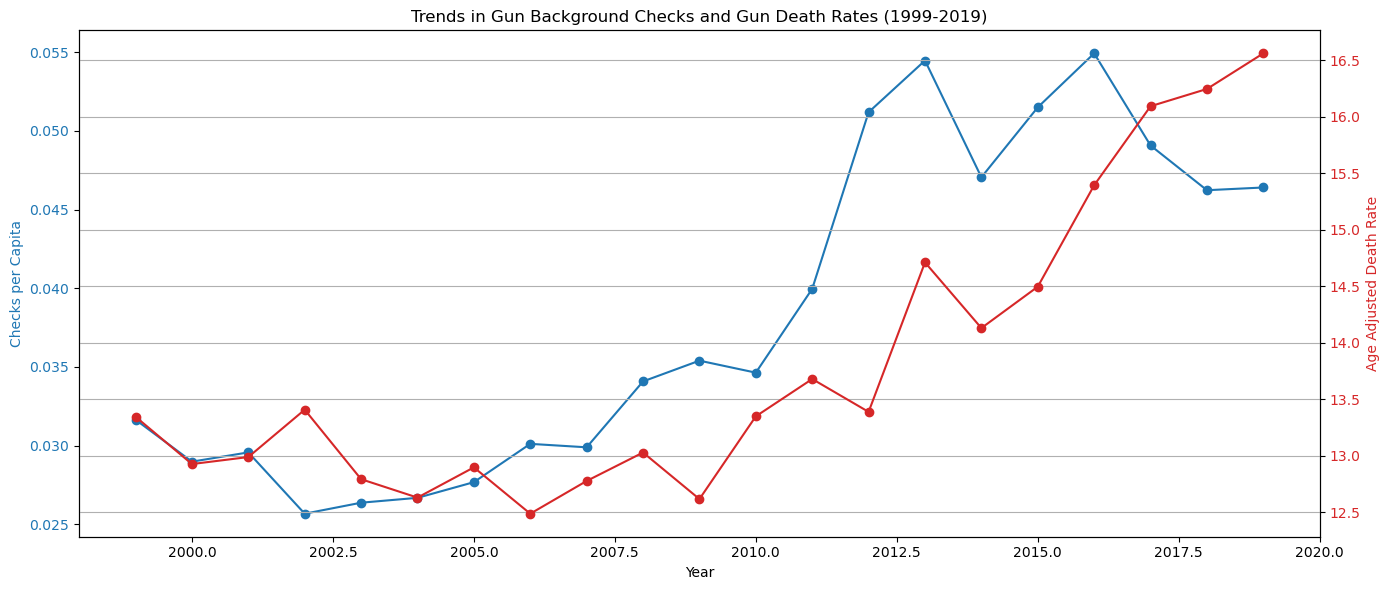

In [42]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot checks per capita on the first y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Checks per Capita', color='tab:blue')
ax1.plot(yearly_trends['year'], yearly_trends['checks_per_capita'], label='Checks per Capita', color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for age adjusted death rates
ax2 = ax1.twinx()
ax2.set_ylabel('Age Adjusted Death Rate', color='tab:red')
ax2.plot(yearly_trends['year'], yearly_trends['Age Adjusted Rate'], label='Age Adjusted Death Rate', color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and grid
plt.title('Trends in Gun Background Checks and Gun Death Rates (1999-2019)')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.grid(True)
plt.show()


**Background Checks per Capita:** There is an upward trend in background checks per capita over the years, with noticeable increases around 2013 and 2016, possibly reflecting responses to political events or mass shootings that often lead to heightened concerns about gun regulations.

**Age-Adjusted Death Rate:** The age-adjusted gun death rate shows a more stable trend, with slight fluctuations but a general increase in recent years.

The trends suggest that while background checks have increased significantly over time, the gun death rate has not decreased correspondingly, indicating other factors might be influencing the rate of gun deaths.\
Also, the two lines do not appear to mirror each other perfectly, indicating that while there is some correlation, it's not a straightforward relationship. 

The parallel increase suggests that background checks alone may not sufficiently curb gun violence. Comprehensive strategies involving prevention, intervention, and community engagement might be necessary to address the root causes.

Understanding these trends can help inform public discussions on gun control policies and their potential impacts.

## Average checks per capita and death rates across states.


<!--
# Statistical Summary and Insights
# Average Background Checks and Death Rates:
# Calculate average checks per capita and death rates across states.
# State-Wise Comparison:
# Identify states with the highest and lowest values for checks per capita and death rates.
# Year-Wise Summary:
# Provide a summary of trends and changes over the years.
-->

In [45]:
# 1. Average Background Checks and Death Rates:
# Calculate the average checks per capita and death rates across all states for the entire period
avg_checks_deaths = merged_data_corrected.groupby('state').agg({'checks_per_capita': 'mean', 'Age Adjusted Rate': 'mean'}).reset_index()

avg_checks_deaths

,state,checks_per_capita,Age Adjusted Rate
0,Alabama,0.053024,20.445626
1,Arizona,0.028368,17.950679
2,Arkansas,0.047964,21.784364
3,California,0.017246,10.137580
4,Colorado,0.057662,13.521301
5,Connecticut,0.022714,5.430920
6,Delaware,0.028356,9.615317
7,Florida,0.029500,13.060118
8,Georgia,0.024756,15.969010
9,Idaho,0.048167,16.128256


C:\Users\DeleLinus\AppData\Local\Temp\ipykernel_9564\3155219535.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_checks_deaths['state'], rotation=90)


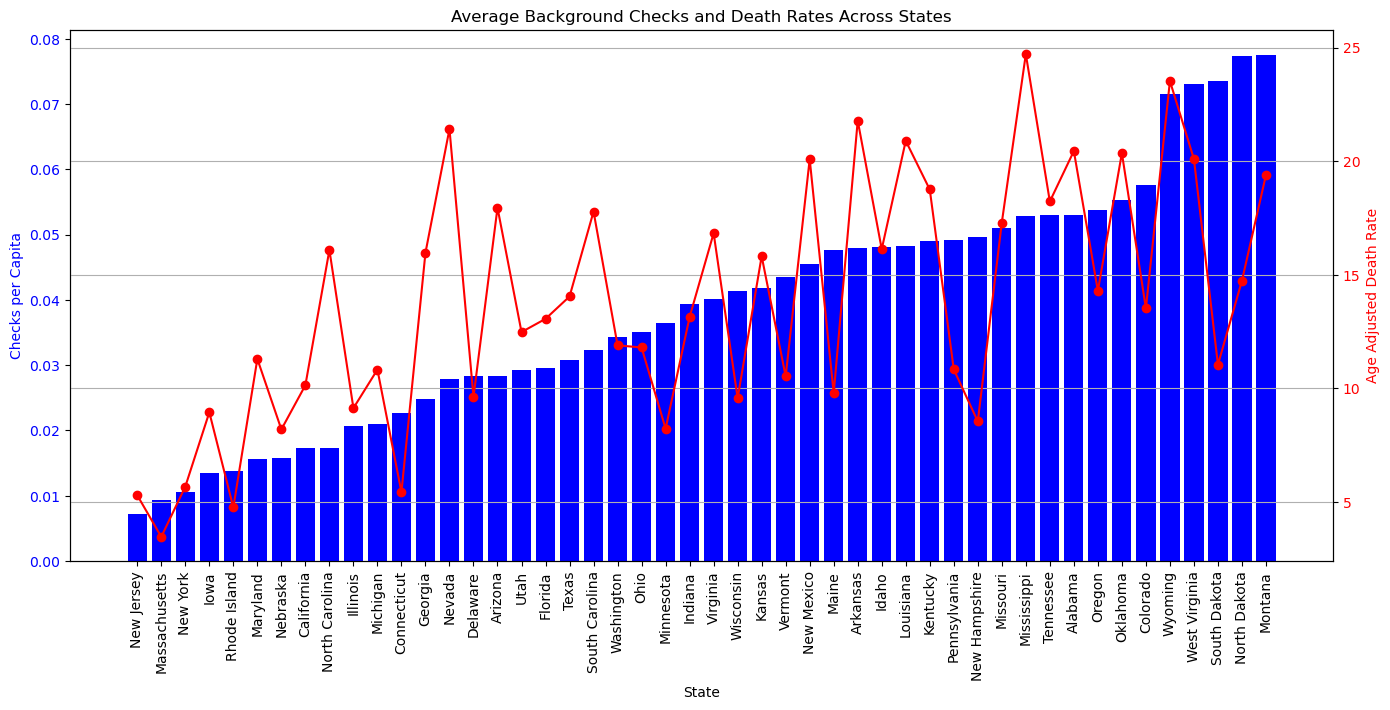

In [46]:
# Plotting the analysis results
fig, ax1 = plt.subplots(figsize=(14, 7))
avg_checks_deaths.sort_values('checks_per_capita', inplace=True)
ax1.bar(avg_checks_deaths['state'], avg_checks_deaths['checks_per_capita'], color='b', label='Checks per Capita')
ax1.set_xlabel('State')
ax1.set_ylabel('Checks per Capita', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(avg_checks_deaths['state'], rotation=90)

ax2 = ax1.twinx()
ax2.plot(avg_checks_deaths['state'], avg_checks_deaths['Age Adjusted Rate'], color='r', marker='o', label='Age Adjusted Death Rate')
ax2.set_ylabel('Age Adjusted Death Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Average Background Checks and Death Rates Across States')
plt.grid(True, axis='both')
plt.show()

**Observations from the Plot:**
- Variability Across States: The plot shows considerable variability in both checks per capita and age-adjusted death rates across states. This highlights regional differences in gun-related activities and outcomes, and also the importance of considering local factors and policies that might influence both gun purchases and gun violence.

- Background Checks Per Capita (Blue Bars): Some states exhibit notably high rates of background checks per capita, suggesting a higher level of engagement or interest in firearm transactions in these regions.

- Age-Adjusted Death Rate (Red Line): States such as Arkansas and Alabama show higher age-adjusted death rates, suggesting that gun violence is more prevalent in these areas despite the number of background checks.

- Correlation with Death Rates: The age-adjusted death rates appear to follow a different trend compared to checks per capita. Some states with high checks per capita do not necessarily have high death rates, underscoring that checks alone may not predict gun-related fatalities.

- Insight into Policy and Enforcement: These differences could be influenced by state-specific laws, cultural attitudes towards firearms, and the effectiveness of background check systems and other preventive measures. States with high death rates might need to explore additional measures beyond background checks to effectively reduce gun violence, such as community-based interventions and education programs.


In [48]:
# 2. State-Wise Comparison:
# States with the highest and lowest values for checks per capita and death rates
highest_checks = avg_checks_deaths.loc[avg_checks_deaths['checks_per_capita'].idxmax()]
lowest_checks = avg_checks_deaths.loc[avg_checks_deaths['checks_per_capita'].idxmin()]
highest_deaths = avg_checks_deaths.loc[avg_checks_deaths['Age Adjusted Rate'].idxmax()]
lowest_deaths = avg_checks_deaths.loc[avg_checks_deaths['Age Adjusted Rate'].idxmin()]

In [49]:
highest_checks, lowest_checks, highest_deaths, lowest_deaths

(state                  Montana
 checks_per_capita     0.077477
 Age Adjusted Rate    19.395482
 Name: 23, dtype: object,
 state                New Jersey
 checks_per_capita       0.00717
 Age Adjusted Rate      5.293253
 Name: 27, dtype: object,
 state                Mississippi
 checks_per_capita       0.052854
 Age Adjusted Rate      24.712201
 Name: 21, dtype: object,
 state                Massachusetts
 checks_per_capita         0.009339
 Age Adjusted Rate         3.464586
 Name: 18, dtype: object)

- **Montana** has the highest checks per capita, which could indicate a robust background check system or a higher gun ownership rate relative to its population.
- **New Jersey and Massachusetts** show low rates of checks per capita and death rates, suggesting effective gun control measures or other socio-economic factors contributing to reduced gun violence.
- **Mississippi** exhibits the highest death rate, pointing to potential underlying issues such as enforcement of gun laws, socio-economic challenges, or cultural factors.

This comparison highlights the variability across states, emphasizing the need for tailored policy approaches to address gun violence effectively. 

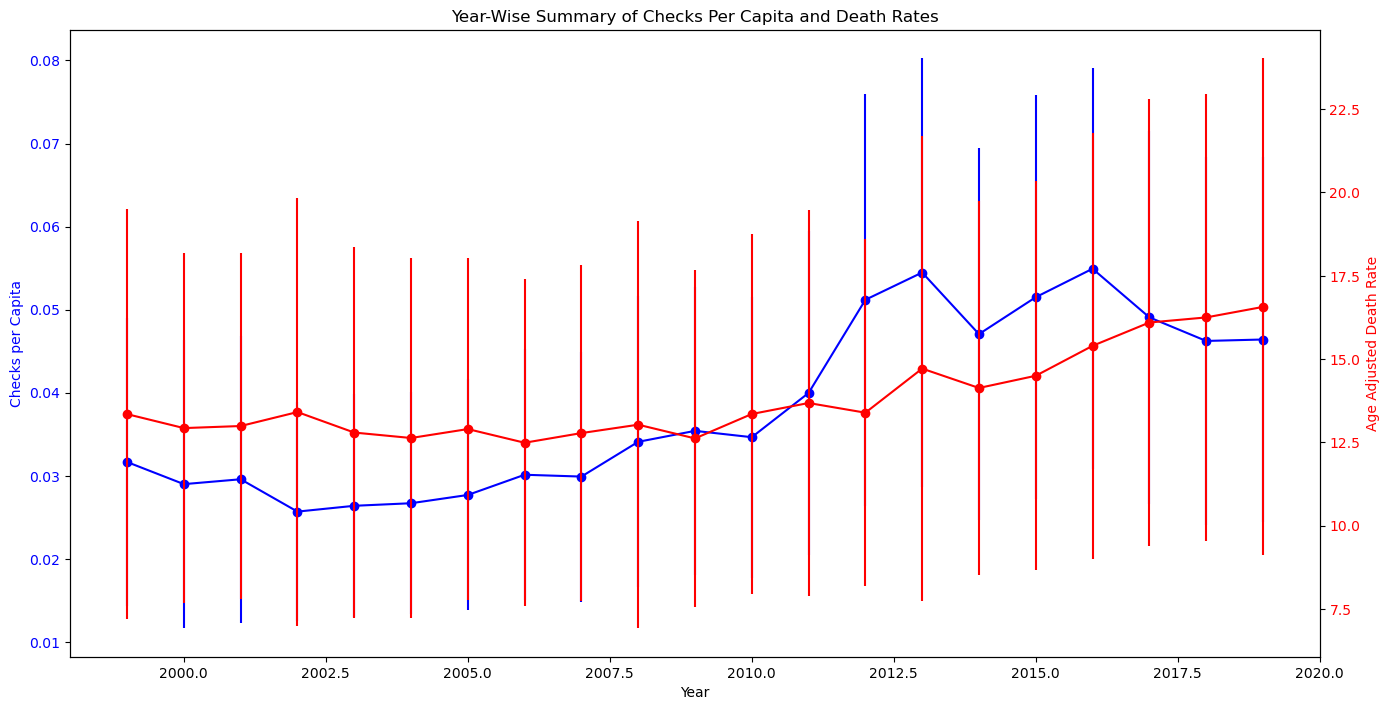

In [79]:
# 3. Year-Wise Summary:
# Calculate yearly trends
yearly_summary = merged_data_corrected.groupby('year').agg({'checks_per_capita': ['mean', 'std'], 'Age Adjusted Rate': ['mean', 'std']}).reset_index()



# State-Wise Comparison Highlighted in the plots above
# Year-Wise Summary Trends
fig, ax3 = plt.subplots(figsize=(14, 7))
ax3.errorbar(yearly_summary['year'], yearly_summary['checks_per_capita']['mean'], yerr=yearly_summary['checks_per_capita']['std'],
             label='Checks per Capita', fmt='-o', color='b')
ax3.set_xlabel('Year')
ax3.set_ylabel('Checks per Capita', color='b')
ax3.tick_params(axis='y', labelcolor='b')

ax4 = ax3.twinx()
ax4.errorbar(yearly_summary['year'], yearly_summary['Age Adjusted Rate']['mean'], yerr=yearly_summary['Age Adjusted Rate']['std'],
             label='Age Adjusted Death Rate', fmt='-o', color='r')
ax4.set_ylabel('Age Adjusted Death Rate', color='r')
ax4.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Year-Wise Summary of Checks Per Capita and Death Rates')
plt.show()


**Observations from the Year-Wise Summary Plot:**

1. **Checks Per Capita (Blue Line):**

   - **General Increase:** There is a noticeable increase in checks per capita over the years, particularly after 2012. This trend reflects a growing number of background checks relative to the population, possibly due to increased firearm purchases or stricter enforcement of background checks.
   - **Variability:** The standard deviation (error bars) indicates moderate variability across states, with some years showing more consistency in the data than others.

2. **Age-Adjusted Death Rate (Red Line):**

   - **Fluctuating but Increasing:** The age-adjusted death rate exhibits fluctuations, but there is a discernible upward trend starting around 2013, peaking in the later years.
   - **Increased Variability:** The error bars suggest increased variability in death rates across states, particularly in the latter years. This could reflect differing state-level factors impacting gun violence.

**Implications:**
   - **Policy Implications:** The simultaneous rise in checks per capita and death rates suggests that background checks alone may not sufficiently reduce gun violence. The trends could be investigated in the context of major events or policy changes affecting gun laws and public attitudes towards gun ownership.  The trends highlight the importance of further research to understand the underlying causes of these changes, especially the increase in death rates despite more background checks.

   - **Regional Analysis:** Diving deeper into regional data could provide insights into why some years or places exhibit higher fluctuations than others.


This analysis underscores the complex relationship between gun control measures and gun violence, emphasizing the need for comprehensive and data-driven policy strategies.

### Geospatial Analysis  to identify any regional patterns 

Let's visualize the geographical distribution of gun death rates and background checks to identify any regional patterns or hotspots. 

In [89]:
# !pip install geopandas
# !pip install shapely

In [83]:
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

fbi_check_data_set['geometry'] = fbi_check_data_set['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(fbi_check_data_set, geometry='geometry')
us_states = gdf.drop_duplicates(subset=['state', 'geometry'])[["state", "geometry"]]

state_abbr = dict(zip(
    gun_death_data_set.drop_duplicates(subset=['State_Name', 'State'])['State_Name'],
    gun_death_data_set.drop_duplicates(subset=['State_Name', 'State'])['State']
        )
     )
us_states['state_abbr'] = us_states['state'].apply(lambda row: state_abbr.get(row, None))

# Using average data from the year 2019 for a snapshot view
latest_year_data = merged_data_corrected[merged_data_corrected['year'] == 2019].copy()

# Merge with geospatial data
geo_merged_data = us_states.merge(latest_year_data, how='right', on='state')

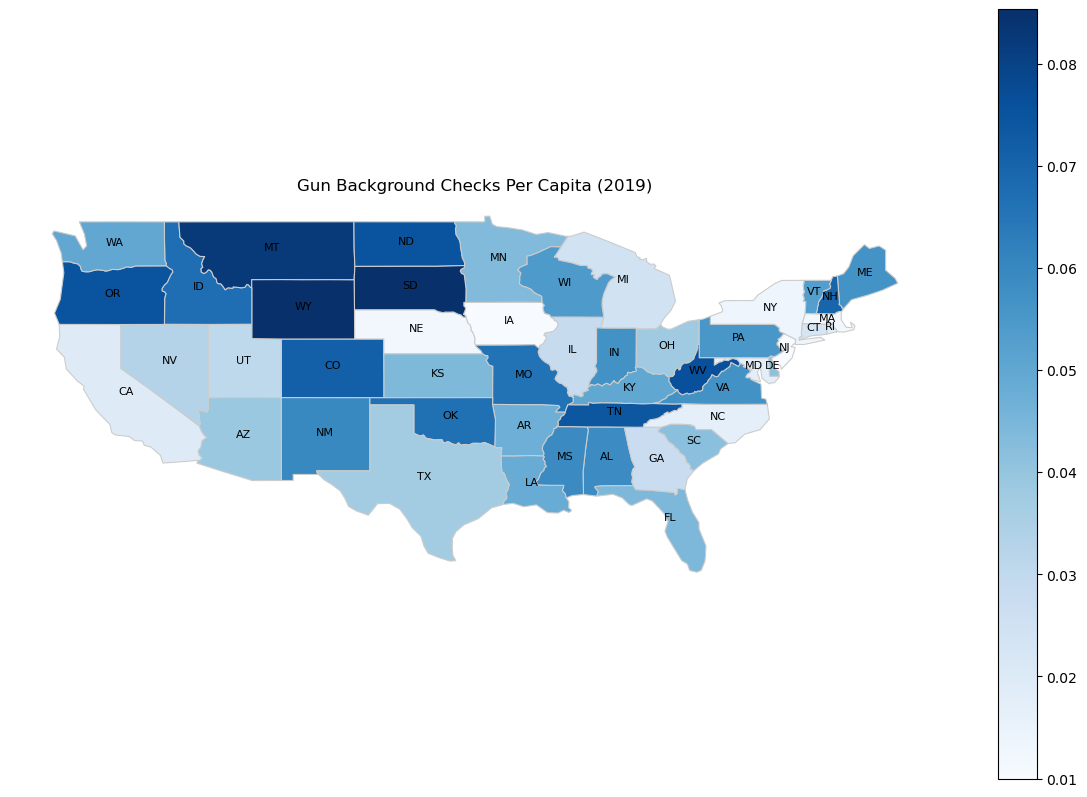

In [84]:
# Plotting the geospatial distribution
fig, ax1 = plt.subplots(1, 1, figsize=(15, 10)) 

# Plot checks per capita
geo_merged_data.plot(
    column='checks_per_capita',
    cmap='Blues',
    linewidth=0.8,
    ax=ax1,
    edgecolor='0.8',
    legend=True
)
ax1.set_title('Gun Background Checks Per Capita (2019)')
ax1.set_axis_off()

# Add state names to the checks per capita map
for idx, row in geo_merged_data.iterrows():
    centroid = row['geometry'].centroid
    ax1.annotate(row['state_abbr'], xy=(centroid.x, centroid.y), horizontalalignment='center', fontsize=8, color='black')
plt.show()

**Gun Background Checks Per Capita (2019):**

* The map shows a varied distribution of background checks per capita across states, with darker shades (higher values) appearing predominantly in the Midwest and parts of the West. While lighter shades, predominantly seen in some Southern and Northeastern states, represent lower rates of background checks per capita. This suggests regional variations in the frequency of gun background checks, possibly influenced by local laws, culture, and attitudes towards gun ownership.

* Understanding these regional variations can help policymakers tailor gun control measures more effectively. States with lower checks per capita may need increased monitoring or adjusted policies to ensure effective background check coverage.

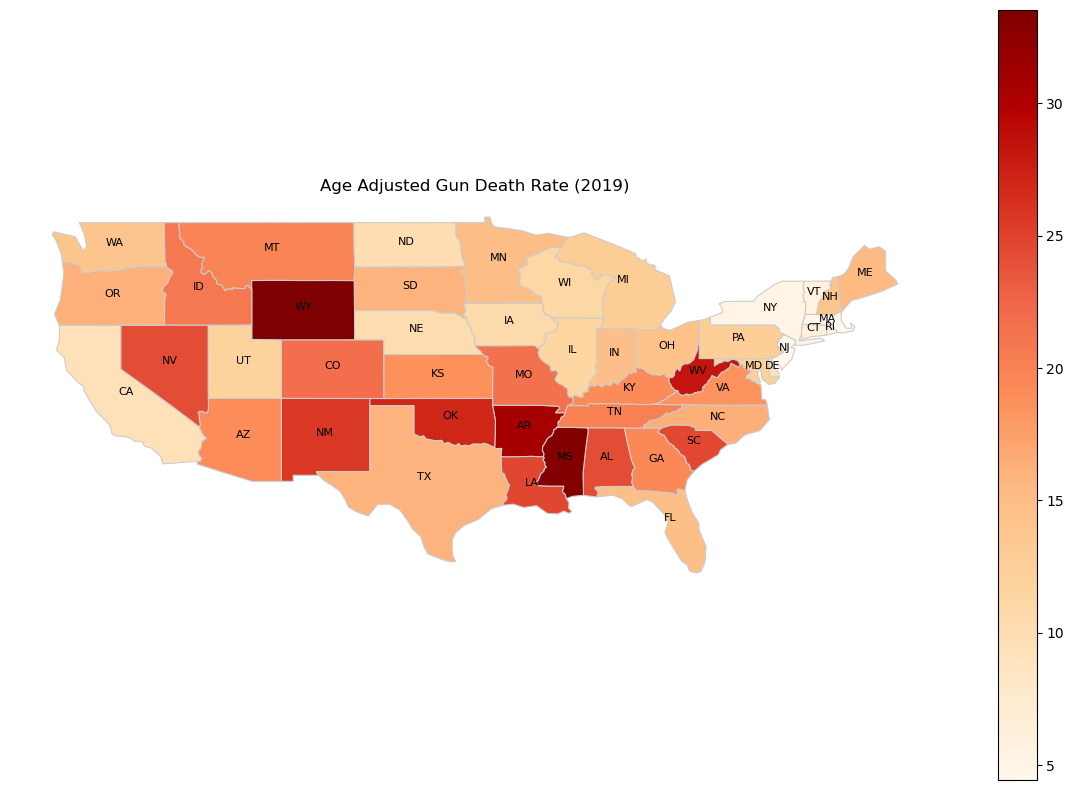

In [87]:
# Plot age-adjusted death rate
fig, ax2 = plt.subplots(1, 1, figsize=(15, 10)) 
geo_merged_data.plot(
    column='Age Adjusted Rate',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax2,
    edgecolor='0.8',
    legend=True
)
ax2.set_title('Age Adjusted Gun Death Rate (2019)')
ax2.set_axis_off()

# Add state names to the death rate map
for idx, row in geo_merged_data.iterrows():
    centroid = row['geometry'].centroid
    ax2.annotate(row['state_abbr'], xy=(centroid.x, centroid.y), horizontalalignment='center', fontsize=8, color='black')


plt.show()


**Age-Adjusted Gun Death Rate (2019):**

- **Darker Shades:** States with darker shades of red indicate higher age-adjusted gun death rates. These states may require more focused attention to understand and mitigate the factors contributing to higher rates of gun-related fatalities.
- **Lighter Shades:** Lighter shades suggest lower gun death rates, possibly indicating effective gun control measures, lower gun ownership, or other socio-economic factors that contribute to fewer gun-related deaths.

**Insights:**
* **Non-Linear Relationship:** The lack of a clear correlation in geographic patterns between the two maps suggests that the relationship between background check rates and gun death rates is complex and likely influenced by a multitude of factors.

* **Potential for Policy Analysis:** These maps could be used by policymakers to identify areas of concern—either regions with high death rates despite lower background checks or areas with high background checks that might benefit from targeted interventions. Conversely, regions with lower rates could serve as models for effective policies and practices.

* **Further Research:** The data presents an opportunity for further research to explore the specific factors contributing to these patterns, including socio-economic conditions, law enforcement effectiveness, healthcare availability, and community programs related to gun safety and mental health.